In [2]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf


C:\Users\KINAR\AppData\Local\Programs\Python\Python310\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.8) or chardet (5.0.0)/charset_normalizer (2.0.10) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


In [19]:
#reading image
img_array=cv2.imread("E:/sem 5/ML Project/train/0/Training_3908.jpg")
#img_array

In [20]:
#read shape of image
img_array.shape

(48, 48, 3)

In [21]:
print(img_array)

[[[163 163 163]
  [128 128 128]
  [114 114 114]
  ...
  [139 139 139]
  [141 141 141]
  [134 134 134]]

 [[147 147 147]
  [114 114 114]
  [102 102 102]
  ...
  [142 142 142]
  [138 138 138]
  [138 138 138]]

 [[112 112 112]
  [106 106 106]
  [ 92  92  92]
  ...
  [140 140 140]
  [141 141 141]
  [134 134 134]]

 ...

 [[139 139 139]
  [141 141 141]
  [136 136 136]
  ...
  [154 154 154]
  [171 171 171]
  [191 191 191]]

 [[140 140 140]
  [133 133 133]
  [120 120 120]
  ...
  [138 138 138]
  [146 146 146]
  [158 158 158]]

 [[136 136 136]
  [134 134 134]
  [113 113 113]
  ...
  [146 146 146]
  [144 144 144]
  [144 144 144]]]


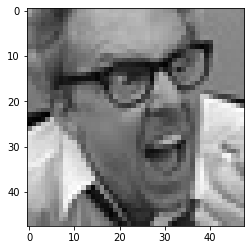

In [22]:
plt.imshow(img_array)

In [23]:
Datadirectory="E:/sem 5/ML Project/train"
Classes=["0","1","2","3","4","5","6"]


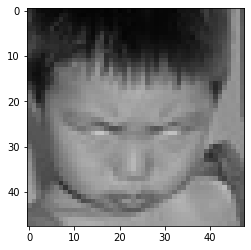

In [24]:
for category in Classes:
    path=os.path.join(Datadirectory,category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        plt.imshow(cv2.cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break

<function matplotlib.pyplot.show(close=None, block=None)>

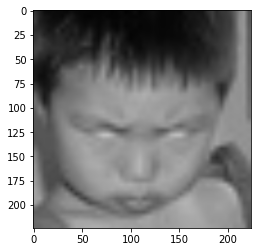

In [25]:
img_size=224 #Immagenet=> 224 x 224
new_array = cv2.resize(img_array, (img_size, img_size))
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
plt.show

In [26]:
new_array.shape

(224, 224, 3)

In [27]:
#Read all images and convert them to array

training_Data=[]

def create_training_Data():
    for category in Classes:
        path=os.path.join(Datadirectory, category)
        class_num = Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                new_array= cv2.resize(img_array, (img_size,img_size))
                training_Data.append([new_array,class_num])
            except Exception as e:
                pass
        
    

In [28]:
create_training_Data()

In [86]:
print(len(training_Data))

28709


In [87]:
temp=np.array(training_Data)
temp.shape

C:\Users\KINAR\AppData\Local\Temp/ipykernel_11688/2236877450.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  temp=np.array(training_Data)


(28709, 2)

In [88]:
import random
random.shuffle(training_Data)

In [31]:
X=[] #data/feature
y=[] #label

for features,label in training_Data:
    X.append(features)
    y.append(label)
    
X=np.array(X).reshape(-1, img_size, img_size, 1) #converting it to 4 dimension

In [32]:
X.shape  # no. of files, img size, img size, no. of channels

(28709, 224, 224, 3)

In [34]:
X=X/255.0; #normalizing data before applying deep learning(scikit learn, etc.) )(By dividing it by maximum level to the black 255)

In [34]:
y[1000]

0

In [35]:
type(y)

list

In [36]:
Y=np.array(y)

In [37]:
Y.shape  

(28709,)

In [3]:
# Deep learning model for training- transfer learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [39]:
# to perform transfer learning (trained weights on 1000 classes used to )

In [40]:
model=tf.keras.applications.MobileNetV2() # pre trained model

In [41]:
model.summary() # the reason why we changes the size of the img

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

In [42]:
#Transfer learning
base_input=model.layers[0].input # i/p

In [43]:
base_output=model.layers[-2].output


In [44]:
base_output

<KerasTensor: shape=(None, 1280) dtype=float32 (created by layer 'global_average_pooling2d')>

In [45]:
final_output=layers.Dense(128)(base_output) ## adding new layer after the o/p of global pooling layer
final_output=layers.Activation('relu')(final_output) # activatn func
final_output=layers.Dense(64)(final_output)         # 
final_output=layers.Activation('relu')(final_output)
final_output=layers.Dense(7, activation='softmax')(final_output)  # my classes 7  (0 to 6), classification layer


In [46]:
final_output

<KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'dense_2')>

In [47]:
new_model=keras.Model(inputs=base_input, outputs=final_output)

In [48]:
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

In [49]:
new_model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [50]:
print(Y)
#Y[7000]

[0 0 0 ... 6 6 6]


In [51]:
Y[7000]

2

In [52]:
new_model.fit(X,Y, epochs=5)

Epoch 1/5
898/898 [==============================] - 3434s 4s/step - loss: 1.2517 - accuracy: 0.5252
Epoch 2/5
898/898 [==============================] - 3548s 4s/step - loss: 1.0823 - accuracy: 0.5908
Epoch 3/5
898/898 [==============================] - 25938s 29s/step - loss: 1.0054 - accuracy: 0.6244
Epoch 4/5
898/898 [==============================] - 3483s 4s/step - loss: 0.9399 - accuracy: 0.6500
Epoch 5/5
898/898 [==============================] - 9440s 11s/step - loss: 0.8940 - accuracy: 0.6677


In [53]:
new_model.save("Final_model-1.h5")

In [40]:
#new_model.fit(X,Y, epochs=25)

In [4]:
new_model=tf.keras.models.load_model('Final_model_1.h5')

In [35]:
#frame=cv2.imread("PrivateTest_9558875.jpg")
#frame=cv2.imread("happyboy.jpg")
frame=cv2.imread("angryboy.jpg")

In [36]:
import matplotlib.pyplot as plt
frame.shape

(900, 600, 3)

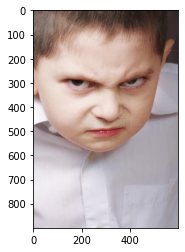

In [37]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [38]:
#face detection algorithm 

In [39]:
faceCascade=cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [40]:
gray=cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

In [41]:
gray.shape

(900, 600)

In [42]:
#plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY))

In [43]:
faces=faceCascade.detectMultiScale(gray, 1.1, 4)
for x,y,w,h in faces:
    roi_gray=gray[y:y+h, x:x+w]
    roi_color=frame[y:y+h, x:x+w]
    cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)  #BGR blue square
    facess=faceCascade.detectMultiScale(roi_gray)
    if len(facess)==0:
        print("Face not detected")
    else:
        for (ex, ey, ew, eh) in facess:
            face_roi=roi_color[ey: ey+eh, ex: ex+ew]

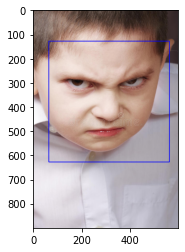

In [44]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

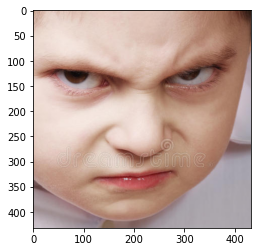

In [45]:
plt.imshow(cv2.cvtColor(face_roi, cv2.COLOR_BGR2RGB))


In [46]:
#import numpy as np
final_image=cv2.resize(face_roi, (224, 224))
final_image=np.expand_dims(final_image, axis=0) 
final_image=final_image/255.0 #normalizing

In [47]:
Predictions=new_model.predict(final_image)

1/1 [==============================] - 0s 114ms/step


In [48]:
Predictions[0]

array([6.5283513e-01, 2.5498637e-04, 5.4319303e-02, 2.6006706e-02,
       7.9460822e-02, 1.7605646e-01, 1.1066616e-02], dtype=float32)

In [25]:
# minimum=Predictions[0]
# for i in range(0, len(Predictions)):
#     if (Predictions[i]<minimum):
#         minimum=Predictions[i]
        


In [26]:
#print(minimum)

In [49]:
#import numpy as np
np.argmax(Predictions)

0

In [50]:
#np.argmax(Predictions)

3


In [51]:
import cv2
img=cv2.VideoCapture(0)
while True:
    abc,frame2=img.read()
    frame2=cv2.imshow('frame2',frame2)
    
    if cv2.waitKey(1)==27:
        break
    
img.release()  
cv2.destroyAllWindows()

error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [39]:
#new_model=tf.keras.models.load_model('Final_model_1')

In [4]:
# new_model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
# new_model.fit(X, Y epochs=25)
# new_model.save('Final_model_1')
# new_model=tf.keras.models.load_model('Final_model_1')